<img src="images/opencv_sunu01.jpg" />

<img src="images/opencv_sunu02.jpg" />

<img src="images/opencv_sunu03.jpg" />

In [1]:
# OpenCv Kullanımı için 
import cv2
cv2.__version__

'3.3.0-dev'

In [2]:
# Matris işlemleri için Numpy
import numpy as np
# Genel bir grafik çizim kütüphanesi / Biz Resim Dosyası göstermek için kulllanacağız
import matplotlib.pylab as plt
# Alltaki satır Kütüphanenin çıktısını jupyther notebook üzerinde göstermeye yarar
%matplotlib inline

In [3]:
# OpenCv nin pek çok fonksiyonu var hepsini ezberlemek mümkün değil
# Sıklıkla kullandıklarımızı zamanla öğreniriz
# Nasıl çalıştığını bilmediğimiz durumlarda helpi kullanabiliriz
# Görüntüyü okumak için imreak kullanılır
help(cv2.imread)

Help on built-in function imread:

imread(...)
    imread(filename[, flags]) -> retval
    .   @brief Loads an image from a file.
    .   
    .   @anchor imread
    .   
    .   The function imread loads an image from the specified file and returns it. If the image cannot be
    .   read (because of missing file, improper permissions, unsupported or invalid format), the function
    .   returns an empty matrix ( Mat::data==NULL ).
    .   
    .   Currently, the following file formats are supported:
    .   
    .   -   Windows bitmaps - \*.bmp, \*.dib (always supported)
    .   -   JPEG files - \*.jpeg, \*.jpg, \*.jpe (see the *Notes* section)
    .   -   JPEG 2000 files - \*.jp2 (see the *Notes* section)
    .   -   Portable Network Graphics - \*.png (see the *Notes* section)
    .   -   WebP - \*.webp (see the *Notes* section)
    .   -   Portable image format - \*.pbm, \*.pgm, \*.ppm \*.pxm, \*.pnm (always supported)
    .   -   Sun rasters - \*.sr, \*.ras (always supported)
    .

In [4]:
# Dosya adını verdiğimiz görüntüyü okuyoruz
img = cv2.imread('racecar-j.jpg')

In [5]:
# Görüntümüz Bir Matris ( numpy )
img.shape
# Matris ebatları satır, sütun, kanal şeklinde tutuluyor 
# Görüntüler Renkliyse kanal sayısı genellikle 3 olur.

(580L, 1000L, 3L)

In [6]:
# Matris İçeriğine bakalım
# ilk 10 satır ilk 10 sutun ve ilk kanal
x_start = 0
x_end = 10
y_start = 0
y_end = 10
channel = 0
img[y_start:y_end,x_start:x_end,0]

array([[188, 188, 188, 189, 189, 190, 190, 190, 190, 190],
       [188, 188, 189, 189, 189, 190, 190, 190, 190, 190],
       [188, 189, 189, 189, 190, 190, 190, 190, 190, 190],
       [189, 189, 189, 190, 190, 190, 191, 191, 191, 191],
       [189, 189, 190, 190, 190, 191, 191, 191, 191, 191],
       [190, 190, 190, 190, 191, 191, 191, 192, 192, 192],
       [190, 190, 190, 191, 191, 191, 192, 192, 192, 192],
       [190, 190, 190, 191, 191, 192, 192, 192, 192, 192],
       [192, 192, 192, 192, 192, 192, 192, 192, 193, 193],
       [192, 192, 192, 192, 192, 192, 192, 192, 193, 193]], dtype=uint8)

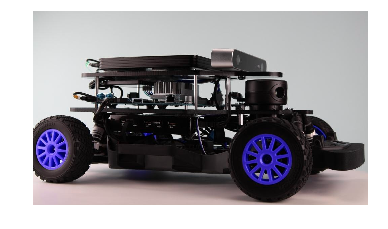

In [7]:
# Okuduğumuz görüntüyü ekranda gösteriyoruz
plt.axis("off")
plt.imshow(img)
plt.show()

<img src="images/opencv_sunu04.jpg" />

In [8]:
# Resmi 4 parçaya ayırıyoruz
left_up = img[:290,:500,:]
right_up = img[:290,500:,:]
left_down = img[290:,:500,:]
right_down = img[290:,500:,:]
image_parts = [left_up,right_up,left_down,right_down]

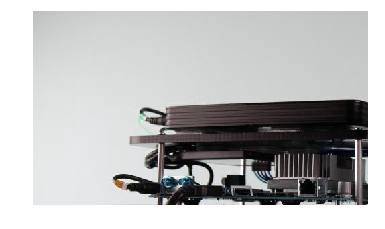

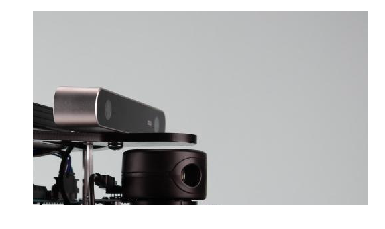

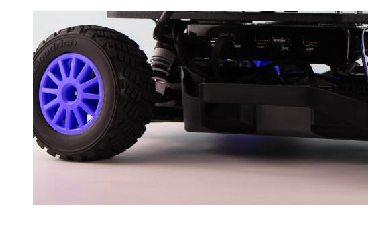

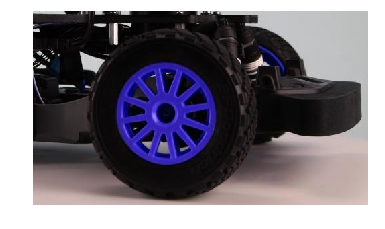

In [9]:
# Parçaları Ayrı ayrı gösteriyoruz
for part_img in image_parts:   
    plt.axis("off")
    plt.imshow(part_img)
    plt.show()

In [10]:
# Parçaları başka bir matride karıştırılmış şekilde birleştiriyoruz
# Önce aynı ebatta başka bir matris oluşturuyoruz
swapped_image = np.zeros_like(img)
# Sol üst ve Sağ alt yer değiştiriyor
# Sol alt ve Sağ üst yer değiştiriyor
swapped_image[:290,:500,:] = right_down 
swapped_image[:290,500:,:] = left_down
swapped_image[290:,:500,:] = right_up
swapped_image[290:,500:,:] = left_up 

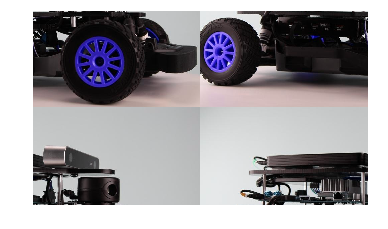

In [11]:
plt.axis('off')
plt.imshow(swapped_image)
plt.show()

In [12]:
# Oluşturduğumuz Görüntüyü Kaydedelim
# Kaydetek için imwrite kullanıyoruz
help(cv2.imwrite)

Help on built-in function imwrite:

imwrite(...)
    imwrite(filename, img[, params]) -> retval
    .   @brief Saves an image to a specified file.
    .   
    .   The function imwrite saves the image to the specified file. The image format is chosen based on the
    .   filename extension (see cv::imread for the list of extensions). Only 8-bit (or 16-bit unsigned (CV_16U)
    .   in case of PNG, JPEG 2000, and TIFF) single-channel or 3-channel (with 'BGR' channel order) images
    .   can be saved using this function. If the format, depth or channel order is different, use
    .   Mat::convertTo , and cv::cvtColor to convert it before saving. Or, use the universal FileStorage I/O
    .   functions to save the image to XML or YAML format.
    .   
    .   It is possible to store PNG images with an alpha channel using this function. To do this, create
    .   8-bit (or 16-bit) 4-channel image BGRA, where the alpha channel goes last. Fully transparent pixels
    .   should have alpha set

In [13]:
cv2.imwrite('swapped.jpg',swapped_image)

True

# Ödev :
* Aynı Resmi farklı bir jupyter dosyasında 16 parçaya ayırıp parçaları rastgele karıştırın ve calisma_2_1 adı ile kaydedin